1. Оцените возможности Sculpting, в <b>Wizard -> Demo -> Sculpting</b>.

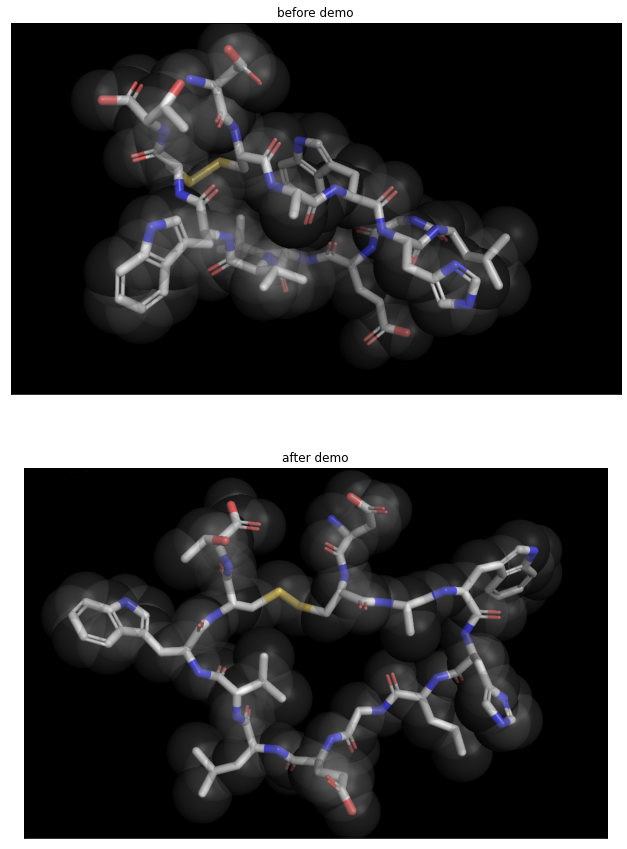

In [1]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(2, 1)

axes[0].imshow(plt.imread('demo_before.png'))
axes[0].set_title('before demo')

axes[1].imshow(plt.imread('demo_after.png'))
axes[1].set_title('after demo')

for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])

fig.set_figwidth(15) 
fig.set_figheight(15) 

plt.show()

    Поработайте в PyMOL с записью 1LMP банка PDB.
    
2. Используюя <i>select within</i> найдите водородные связи которыми белок связывает лиганд.

    Команды для скрипта, использованные в PyMOL.

In [ ]:
fetch 1lmp
extract water, resn HOH
delete water
select ligand, resn NAG+NDG
util.cbaw
select prot, not ligand
color lightpink, prot
set dash_width, 1
select cont, byres prot within 3.5 of ligand
show lines, cont
color lightblue, cont
distance hbond, cont, ligand, 3.5, 2
set dash_color, yellow
zoom cont

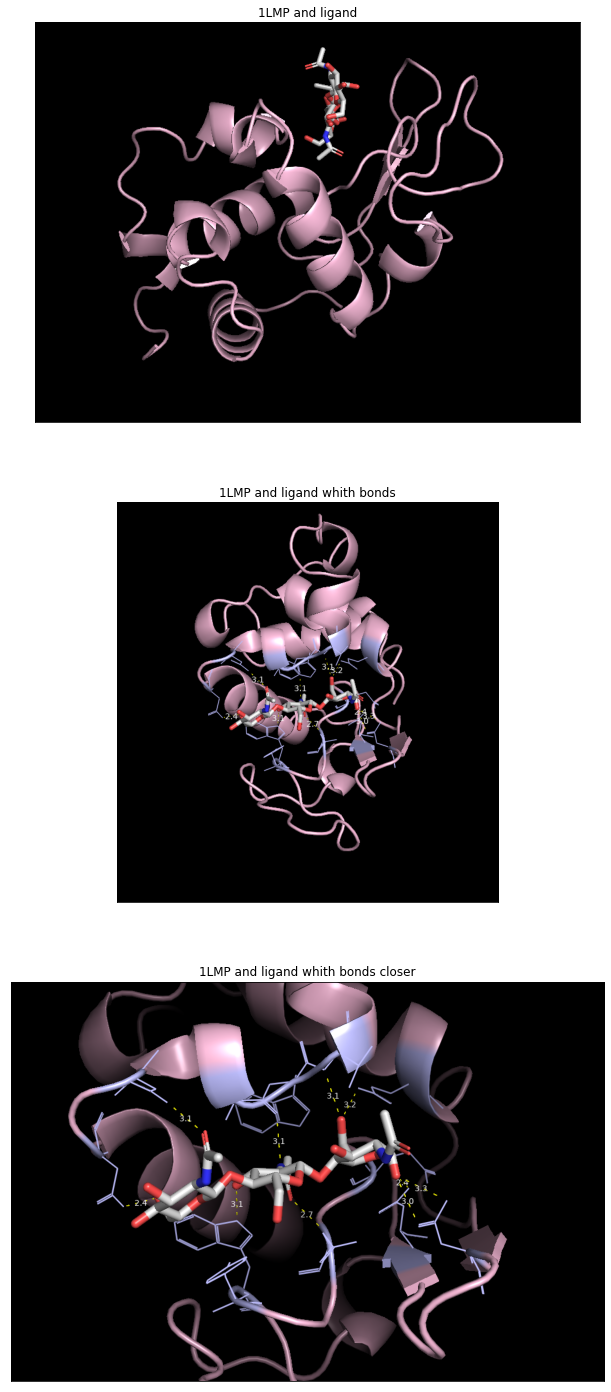

In [2]:
fig, axes = plt.subplots(3, 1)

axes[0].imshow(plt.imread('1LMP.png'))
axes[0].set_title('1LMP and ligand')

axes[1].imshow(plt.imread('1LMP_ligand.png'))
axes[1].set_title('1LMP and ligand whith bonds')

axes[2].imshow(plt.imread('1LMP_ligand_close.png'))
axes[2].set_title('1LMP and ligand whith bonds closer')


for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])

fig.set_figwidth(15) 
fig.set_figheight(25) 

plt.show()

3. Средствами Tcl/Tk интерфейса <b>Wizard->Mutagenesis</b> проведите мутацию в белке, которая по вашему мнению должна привести к потере связывания с лигандом.

Точно сложно сказать, какая мутация точно приведет к потере связывания с лигандом. Но я выбрала ASP под номером 101 и заменила его на TRP, хотя не знаю, действительно ли такая замена приведет к потеря связи с лигандом. Замена производилась непосредственно в программе, без кода. Белок сохранён как <b>1lmp_mut.pdb</b>.

4. Используя команды <i>mset, mview, super, translate</i> создайте анимационный ролик mpeg где происходит совмещение белков и показывается место мутации.

Скрипт для создания анимации.

[Ссылка для скачивания видео](https://github.com/rastvorova/rastvorova.github.io/blob/main/drug.design/Rastvorova_task2_movie.mpg)

In [ ]:
fetch 1lmp, prot
load 1lmp_mut.pdb, mutate

color lightpink, prot
color lightblue, mutate

color grey90, resn NAG+NDG

show sticks, resi 101
color lightmagenta, resi 101 and prot
color purpleblue, resi 101 and mutate
label prot & n. CA and i. 101, resn, resi
label mutate & n. CA and i. 101, resn, resi

hide nonbonded
hide dashes

zoom all
mset 1 x150

frame 1
translate [-20, 0, 0], object=prot
translate [20, 0, 0], object=mutate
mview store

frame 70
translate [20, 0, 0], object=prot
translate [-20, 0, 0], object=mutate
mview store

frame 150
zoom  i. 101
mview store, object=prot
mview store, object=mutate
mview store
mview reinterpolate
mplay

![gif](Rastvorova_task2_movie.gif "segment")

5. Приседените флуорусцентную метку TAMRA к белку через сложноэфирную связь. Используйте команды <i>fuse и torsion</i>.

Сначала посмотрим на белок и найдём аминокислоты, к которым может присоединиться Tamra через эфирную связь. Такие аминокислоты должны содержать гидроксильную огруппу, так как Tamra имеет карбоксильную. Найдём все серины и выберем тот, который расположен на поврхности. Я выбрала серин под номером 122.

In [ ]:
fetch 1lmp
extract water, resn HOH
delete water
show sticks
hide cartoon
color white
color pink, resn SER
color blue, (resn SER and name OG)
zoom resi 122

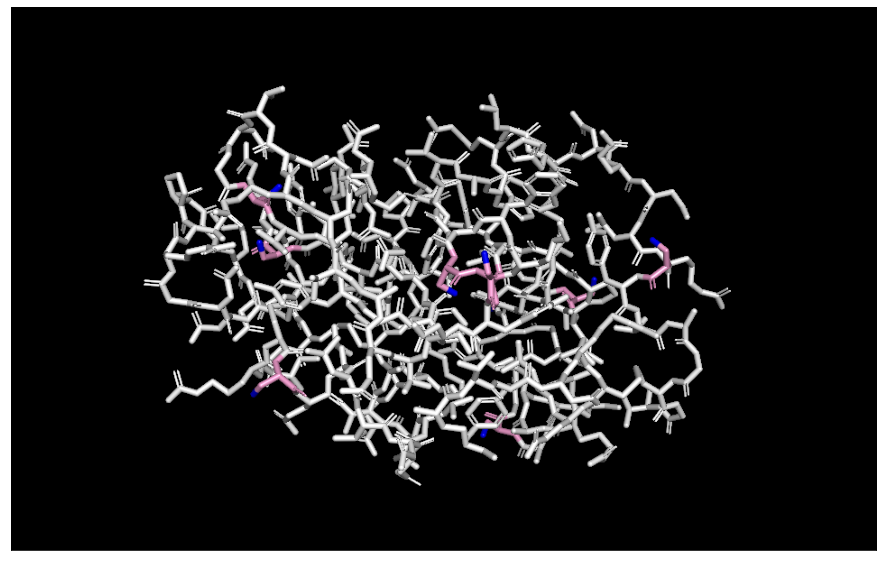

In [3]:
plt.figure(figsize=(20, 10))
plt.imshow(plt.imread('122.png'))

plt.xticks([])
plt.yticks([])

plt.show()

Теперь посмотрим на флуорисцентную метку Tamra. И удалим группу -OH, которая будет участвовать в реакции этерификации. У белка атомы водорода не указаны, поэтому у него ничего не удаляем.

In [ ]:
load Tamra.sdf
zoom tamra
color red, tamra
label tamra, name
remove (id 2, id 54)
select AG, Tamra and id 29
color wheat, AG

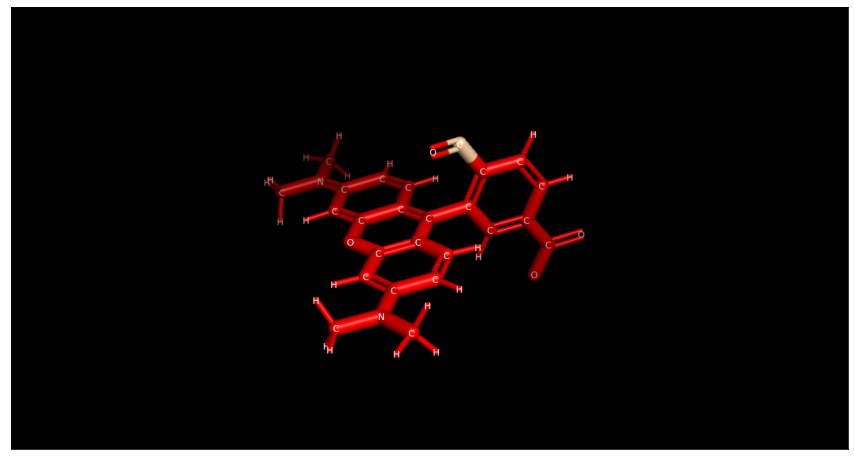

In [4]:
plt.figure(figsize=(15, 12))
plt.imshow(plt.imread('tamra.png'))

plt.xticks([])
plt.yticks([])

plt.show()

Выберем атомы, которые будут участвовать в реакции и соеденим их.
С помощью <i>torsion</i> будем изменять градус, чтобы подобрать наиболее оптимальное положение метки.

In [ ]:
select 122, resi 122
select OG122, /1lmp//A/SER`122/OG
color yellow, OG122

fuse AG, OG122
zoom pkbond

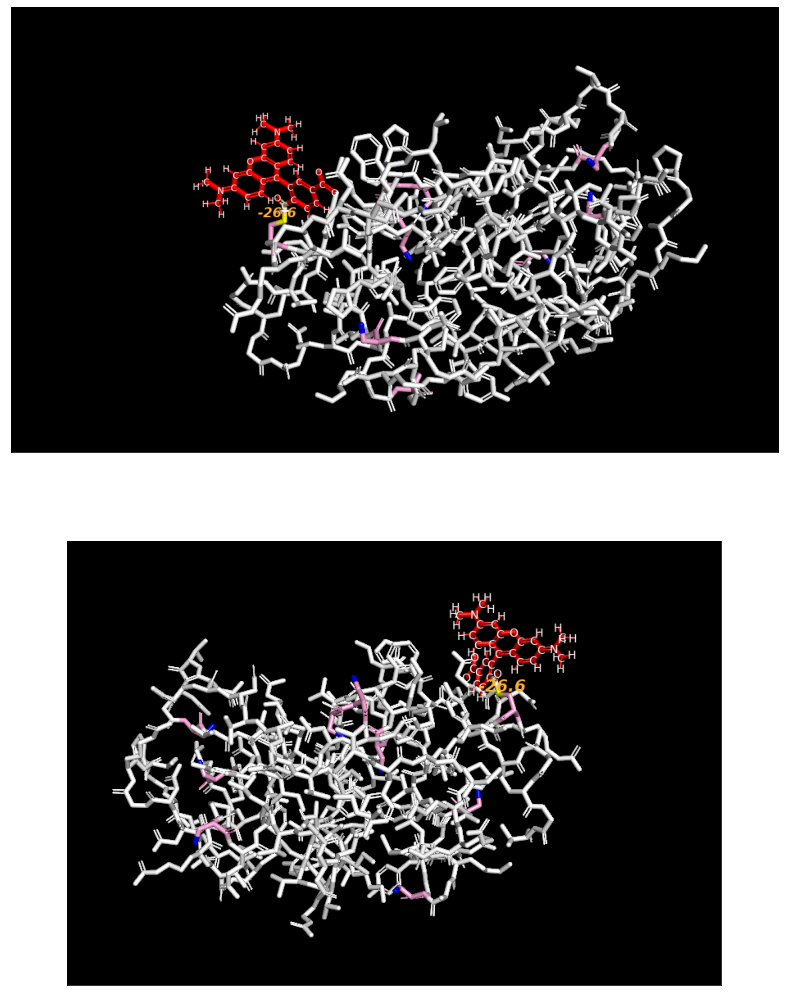

In [5]:
fig, axes = plt.subplots(2, 1)

axes[0].imshow(plt.imread('tamra_n_1lmp_1.png'))
axes[1].imshow(plt.imread('tamra_n_1lmp_2.png'))

for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])

fig.set_figwidth(15) 
fig.set_figheight(18) 

plt.show()

6. Напишите скрипт для построения поли-аланиновой альфа-спирали длинной 100 аминкислот.

Я выбрала триптофан.

In [ ]:
fragment trp
util.cbao
python
for x in range(2, 101):
	cmd.edit("/trp///"+ str(x) +"/c")
	editor.attach_amino_acid("pk1", "trp")
for x in range(2, 101):
	cmd.edit("/trp///" + str(x) + "/N", "/trp///" + str(x) + "/CA")
	cmd.torsion (-61) 
	cmd.edit("/trp///" + str(x) + "/CA", "/trp///" + str(x+1) + "/C")
	cmd.torsion (-42)
python end
zoom

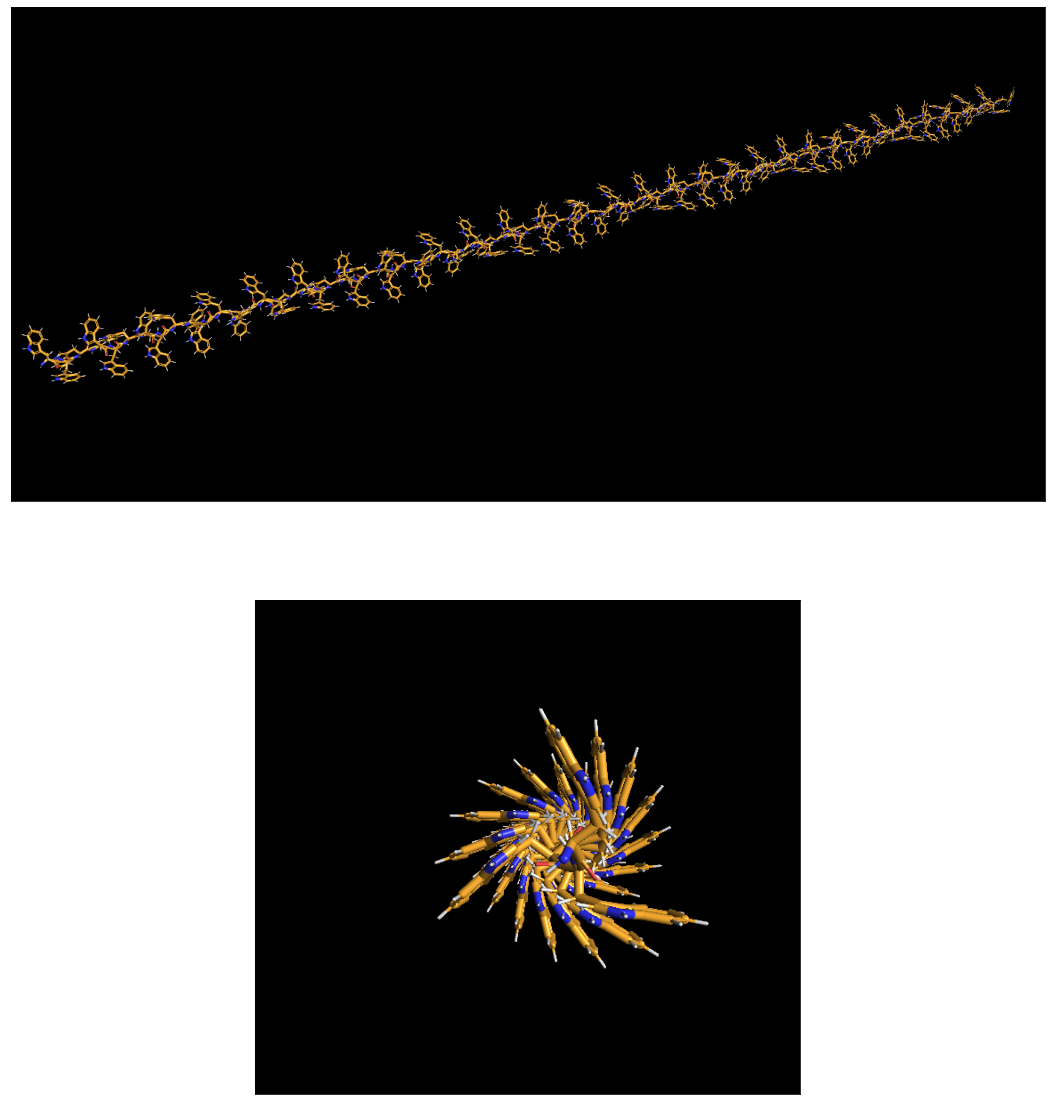

In [6]:
fig, axes = plt.subplots(2, 1)

axes[0].imshow(plt.imread('trp.png'))
axes[1].imshow(plt.imread('trp2.png'))

for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])

fig.set_figwidth(20) 
fig.set_figheight(20) 

plt.show()